<a href="https://colab.research.google.com/github/Syiful047/SENIN-SIANG_SYIFUL-ANAM_0110222144/blob/main/Praktikum07_apples_and_oranges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# KLASIFIKASI APPLES VS ORANGES MENGGUNAKAN SVM

# Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [2]:
# Menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Memanggil data lewat gdrive
path = "/content/gdrive/MyDrive/MATKUL/SEMESTER_SEVEN/MACHINE_LEARNING/PRAKTIKUM/Praktikum07"

In [4]:
# Membaca data file CSV
df = pd.read_csv(path + "/data/apples_and_oranges.csv")
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [5]:
# Melihat info dasar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
# Menampilkan statistika deskriptif dari dataset
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [7]:
# Cek missing value
print(df.isnull().sum())

# Cek tipe data tiap kolom
print(df.dtypes)

Weight    0
Size      0
Class     0
dtype: int64
Weight      int64
Size      float64
Class      object
dtype: object


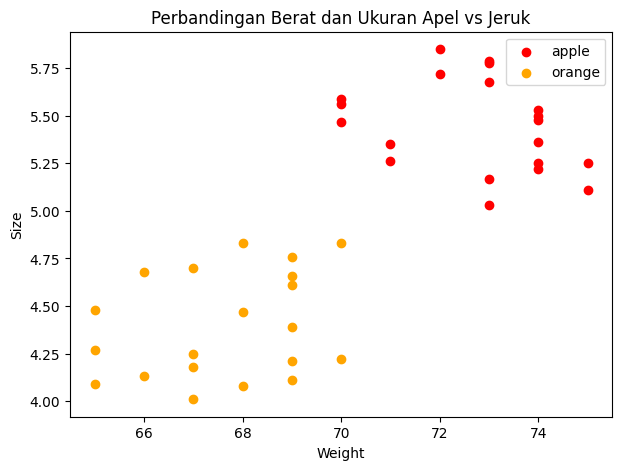

In [9]:
# Visualisasi sebaran data
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
for label, color in zip(['apple', 'orange'], ['red', 'orange']):
    subset = df[df['Class'] == label]
    plt.scatter(subset['Weight'], subset['Size'], label=label, color=color)

plt.xlabel('Weight')
plt.ylabel('Size')
plt.legend()
plt.title('Perbandingan Berat dan Ukuran Apel vs Jeruk')
plt.show()

In [10]:
# Pisahkan fitur dan label
X = df[['Weight', 'Size']]
y = df['Class']

In [11]:
# Encode label (apple/orange → 0/1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [12]:
# Split data menjadi data latih dan uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42
)

In [13]:
# Buat model SVM dan latih
from sklearn.svm import SVC

model = SVC(kernel='linear')  # kernel bisa diganti: 'linear', 'rbf', 'poly'
model.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
# Prediksi dan evaluasi hasil
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\n Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Akurasi Model: 1.0

 Laporan Klasifikasi:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         6
      orange       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


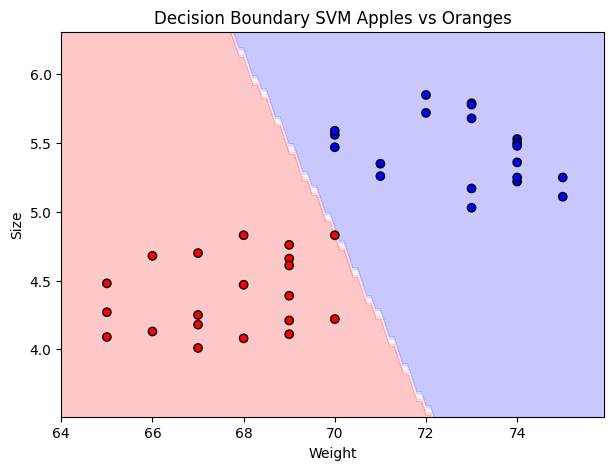

In [16]:
# Visualisasi decision boundary
import numpy as np

x_min, x_max = X['Weight'].min() - 1, X['Weight'].max() + 1
y_min, y_max = X['Size'].min() - 0.5, X['Size'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.25, cmap='bwr')
plt.scatter(X['Weight'], X['Size'], c=y_encoded, edgecolors='k', cmap='bwr')
plt.xlabel("Weight")
plt.ylabel("Size")
plt.title("Decision Boundary SVM Apples vs Oranges")
plt.show()

In [22]:
# Prediksi buah baru (input manual)
print("\nPREDIKSI BUAH BARU")
berat = float(input("Masukkan berat buah (Weight): "))
ukuran = float(input("Masukkan ukuran buah (Size): "))

prediksi = model.predict([[berat, ukuran]])
hasil = le.inverse_transform(prediksi)[0]
print(f"\n Berdasarkan model SVM Linear, buah tersebut diprediksi sebagai: {hasil.upper()}")


 PREDIKSI BUAH BARU
Masukkan berat buah (Weight): 66
Masukkan ukuran buah (Size): 4.0

 Berdasarkan model SVM Linear, buah tersebut diprediksi sebagai: ORANGE


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
